## Observations and Insights :                


### 1. Summary Statistics of Tumor Volume (mm3):

  ##### Drugs  "Capomulin ,Ramicane and Ceftamin": 
                - Above drugs show promising results on reducing the overall 'Tumor Volume' over 'Time'. They have 
                  lower variance among the observations and also a low deviation from the mean.                   
                - This proves that observations are normally distributed without the outliers, which has been proved with a
                  box plot.
                
 ##### Drugs  "Ketapril, Neftisol, Placebo, Propriva and Stelasyn":          
                - Above drugs have higher variance among the observations and also greater deviation from the mean. 
                - This proves that Tumer sizes are not normally distributed over time and there could be 
                  some outliers. 
                  
                - Plotting Avg. Tumor volume vs Time for the above drugs will provide a clear picture of their effectiveness 
                  on reducing the overall size of the Tumor over time. 
                
### 2. Male/Female Ratio: 
                - From the Pie chart it is clear that in the overall study of 'Drug Regimen' , we have more Male mice 
                  vs Females. 
              
                - To uncover overall 'Drug Effectiveness by Gender', we need further analysis of Avg. Tumor Volume over time 
                  for each 'Drug Regimen' classified by gender. 
                  
### 3. Capomulin Analysis:
                - Deep analysis on 'Capomuline' on a single mouse(s185) shows a significant reduction in Tumor Volume(mm3)
                  just in 45 days, which is very promising.
                  
                - Scatter plot of 'Avg. Tumor Volume vs Weight' and 'Calculation of Correlation Coefficient' (0.84 
                  for Capomuline) determine that 'Tumer size' and 'Mouse Weight' are positively related.
             
                - This analysis can be used to control weight during the course of treatment well as gather insights on
                  duration and dosage of prescription "Capomulin"  based on the weight scale.
                
                  
                  
### Overall Summary: 
                1. Drug Regimen "Capomuline" is leading in reducing the Tumer Size within the short period (45 days) and 
                   can be the top recommendation for the treatment. 
                2. Drug Regimen "Ramicane" also shows promising results and can be considered for treatment as well. Further 
                   investigation and analysis might be needed for a better comparison between the two. 
                3. Linear regression Model for Capomuline shows that there is a positive correlation between 'Tumor Volume 
                   and Weight', which should be taken into consideration during the course of treatment.
                4. Box plot of the final tumor volume of each mouse across four promising regimens show a normal 
                   distribution of data without outliers except for Infubinol.
                5. Analysis on 'Metastic increase' and 'No. of mouse survived over the course of treatment' might uncover 
                   further insights on "Capomuline" and other Drug Regimen.
                  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#Ensure merging happens without losing data
print(f"Number of columns in mouse_metadata : {mouse_metadata.shape[0]}")
print(f"Number of columns in study_results : {study_results.shape[0]}")

Number of columns in mouse_metadata : 249
Number of columns in study_results : 1893


In [4]:
# Combine the data into a single dataset
Mouse_study_result = pd.merge(mouse_metadata,study_results , how ='outer', on ="Mouse ID")

# Display the data table for preview

print(f"Number of columns in Mouse_study_result : {Mouse_study_result.shape[0]}")
Mouse_study_result

Number of columns in Mouse_study_result : 1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


##### Note : Having the same Number of rows in mergerd 'Mouse_study_result' df as 'study_results' df ensures that no irrelevent Mouse ID was added and no data was lost.

In [5]:
# Checking the number of mice befire dropping the 'Duplicates'.
Total_Mice = pd.DataFrame({ "Total Mice ID" : [Mouse_study_result['Mouse ID'].count()]})
Total_Mice

,Total Mice ID
0,1893


###### Note: Above Table shows 'Total mice ID ' before dropping the duplicates.





#### Find Duplicated Mouse IDs:

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Timepoint = Mouse_study_result.loc[Mouse_study_result.duplicated(subset=["Mouse ID","Timepoint"] , keep= False),["Mouse ID","Timepoint"]]

pd.DataFrame({"Duplicated Mouse ID" : Duplicate_Timepoint["Mouse ID"].unique()})

,Duplicated Mouse ID
0,g989


##### Note : Using 'keep =False' in .duplicated() function , we can identify all the duplicated values in 'Mouse ID' and 'Timepoint' columns

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_Timepoint

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_study_result_clean = Mouse_study_result.drop_duplicates(subset=["Mouse ID","Timepoint"])
Mouse_study_result_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
Total_Mice_clean = pd.DataFrame({ "Total Mice ID" : [Mouse_study_result_clean['Mouse ID'].count()],
                                  "Total Unique Mice ID" :[len(Mouse_study_result_clean['Mouse ID'].unique())]
                                })
Total_Mice_clean

,Total Mice ID,Total Unique Mice ID
0,1888,249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#calculating  mean, median, variance, standard deviation, and SEM of the tumor volume.
Grouped_Regimen = Mouse_study_result_clean.groupby("Drug Regimen")
Tumer_mean = Grouped_Regimen["Tumor Volume (mm3)"].mean()
Tumer_median = Grouped_Regimen["Tumor Volume (mm3)"].median()
Tumer_var = Grouped_Regimen["Tumor Volume (mm3)"].var()
Tumer_std = Grouped_Regimen["Tumor Volume (mm3)"].std()
Tumer_SEM = Grouped_Regimen["Tumor Volume (mm3)"].sem()

#Creating a DataFrame
Regimen_summary_statistics = pd.DataFrame({
                                           "Total_Volume Mean" : round(Tumer_mean,2),
                                           "Total_Volume Median" : round(Tumer_median,2),
                                           "Total_Volume Variance" : round(Tumer_var,2),
                                           "Total_Volume Standard Deviation" : round(Tumer_std,2),
                                           "Total_Volume Standard Error" : round(Tumer_SEM,2),
})
#Printing the DataFrame
Regimen_summary_statistics

,Total_Volume Mean,Total_Volume Median,Total_Volume Variance,Total_Volume Standard Deviation,Total_Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
Grouped_Regimen_Agg = Mouse_study_result_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

#Renaming columns to look good
Grouped_Regimen_Agg = Grouped_Regimen_Agg.rename(columns = {"mean":"Mean" ,"median":"Median","var":"Variance","std":"Standard Deviation","sem":"Standard Error"})
round(Grouped_Regimen_Agg,2)

Tumor Volume (mm3)                                     \
                           Mean Median Variance Standard Deviation   
Drug Regimen                                                         
Capomulin                 40.68  41.56    24.95               4.99   
Ceftamin                  52.59  51.78    39.29               6.27   
Infubinol                 52.88  51.82    43.13               6.57   
Ketapril                  55.24  53.70    68.55               8.28   
Naftisol                  54.33  52.51    66.17               8.13   
Placebo                   54.03  52.29    61.17               7.82   
Propriva                  52.39  50.91    43.14               6.57   
Ramicane                  40.22  40.67    23.49               4.85   
Stelasyn                  54.23  52.43    59.45               7.71   
Zoniferol                 53.24  51.82    48.53               6.97   

                             
             Standard Error  
Drug Regimen                 
Capomulin              0.33  
Ceftamin               0.47  
Infubinol              0.49  
Ketapril               0.60  
Naftisol               0.60  
Placebo                0.58  
Propriva               0.53  
Ramicane               0.32  
Stelasyn               0.57  
Zoniferol              0.52

## Bar and Pie Charts:

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Get Values for Y- Axis
Regimen_count = Grouped_Regimen["Mouse ID"].count()

y_axis = Regimen_count.sort_values(ascending=False)

#Get values for X- Axis
x_axis = y_axis.index

#Create a Dataframet to display axis values
barplot_df = pd.DataFrame({
                            "X_Axis Data": x_axis,
                            "Y_Axis Data": y_axis
})
barplot_df

,X_Axis Data,Y_Axis Data
Drug Regimen,,
Capomulin,Capomulin,230
Ramicane,Ramicane,228
Ketapril,Ketapril,188
Naftisol,Naftisol,186
Zoniferol,Zoniferol,182
Stelasyn,Stelasyn,181
Placebo,Placebo,181
Infubinol,Infubinol,178
Ceftamin,Ceftamin,178


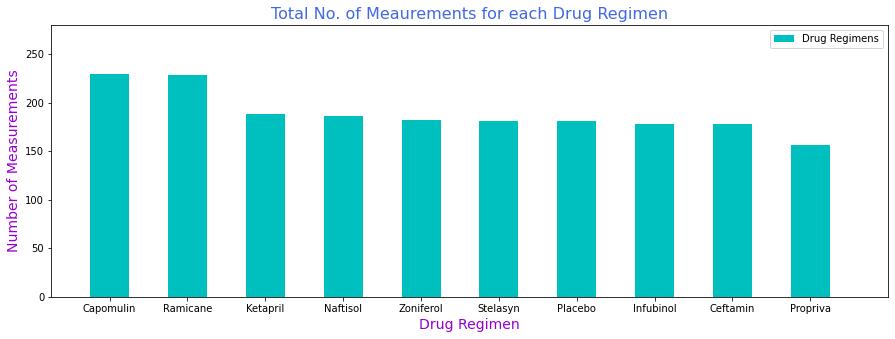

<Figure size 432x288 with 0 Axes>

In [13]:
#Ploting Bar Chart with title and labels
regimen_chart = y_axis.plot.bar(label='Drug Regimens',figsize =(15,5) , rot=0,  color='c')

#Custommizing the chart
#set label and legend
regimen_chart.set_xlabel("Drug Regimen" ,fontdict={'fontsize': 14 ,"fontweight":3, 'color': 'darkviolet'})
regimen_chart.set_ylabel("Number of Measurements", fontdict={'fontsize': 14 ,"fontweight":3, 'color': 'darkviolet'} )
regimen_chart.set_title("Total No. of Meaurements for each Drug Regimen",fontdict={'fontsize': 16 , 'color': 'royalblue'})
plt.legend(loc ='best')

#set X and Y limits
plt.xlim(-0.75,len(x_axis))
plt.ylim(0,max(y_axis)+50)

plt.show()
plt.tight_layout()

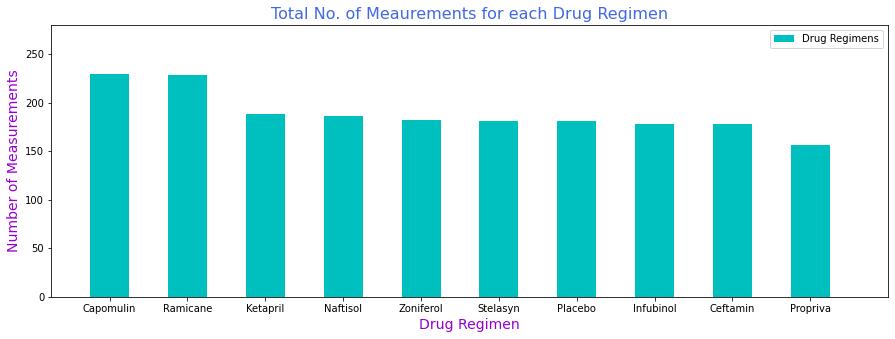

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(15,5))
plt.bar(x_axis , y_axis, label='Drug Regimens',  color = 'c', width =0.5)

#Custommizing the chart
#set label and legend and Title
plt.title("Total No. of Meaurements for each Drug Regimen",fontdict={'fontsize': 16 , 'color': 'royalblue'})
plt.xlabel("Drug Regimen", fontdict={'fontsize': 14 ,"fontweight":3, 'color': 'darkviolet'})
plt.ylabel("Number of Measurements" , fontdict={'fontsize': 14 ,"fontweight":3, 'color': 'darkviolet'})

#setting X and Y limits
plt.xlim(-0.75,len(x_axis))
plt.ylim(0,max(y_axis)+50)
plt.legend(loc ='best')

plt.show()
plt.tight_layout()

## Pie Charts:

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Find Female vs male ratio
Gender_ratio = Mouse_study_result_clean["Sex"].value_counts()
Gender_ratio_df =pd.DataFrame(Gender_ratio)
Gender_ratio_df

,Sex
Male,958
Female,930


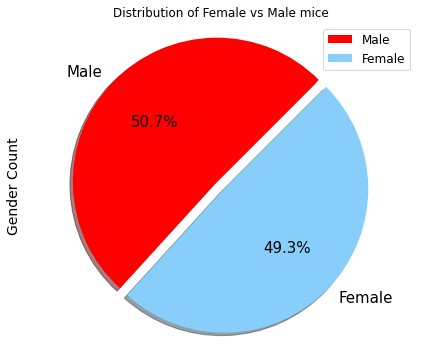

In [16]:
#Plotting pie plot using pandas
#set color and Explode
colors = ["red", "lightskyblue"]
explode = (0, 0.07)

#Plot pie chart using Pandas
gender_pie = Gender_ratio.plot(kind="pie" ,
                  y='"Gender Count"',
                  explode=explode, 
                  autopct="%1.1f%%", 
                  shadow=True, 
                  startangle=45 , 
                  colors = colors,           
                  figsize=(7, 6),                  
                  title = "Distribution of Female vs Male mice",
                  fontsize = 15)

#set label and legend
gender_pie.set_ylabel("Gender Count", fontsize = 14)
plt.legend(loc="best" , fontsize = 12)
plt.axis("equal")
plt.show()

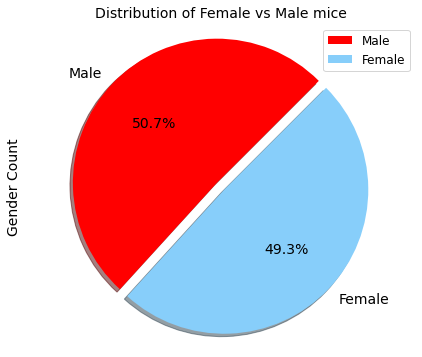

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Male", "Female"]
plt.figure(figsize=(7,6))

# plot Pie using matplotlib
plt.pie(Gender_ratio , 
                  explode=explode, 
                  autopct="%1.1f%%", 
                  shadow=True, 
                  startangle=45 , 
                  colors = colors, labels = labels,
                  textprops={'fontsize': 14})

#set title and labels
plt.title("Distribution of Female vs Male mice", fontsize = 14)
plt.ylabel("Gender Count", fontsize = 14)
plt.legend(loc="best" , fontsize = 12)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Mouse_study_result_clean.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
Final_timepoint = Mouse_study_result_clean[Mouse_study_result_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby("Mouse ID")
#Final Tumor volume without merge to get the tumor volume at the last timepoint
Final_volume1 = Final_timepoint.max()

In [20]:
#Final Tumor volume to  merge dataframe later to get the tumor volume at the last timepoint
Final_volume = pd.DataFrame(Final_timepoint.Timepoint.max())
Final_volume = Final_volume.reset_index()
Final_volume

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


#####  Note: Above table shows last 'Time Point' noted for each Mouse for the following drug regimen "Capomulin", "Ramicane", "Infubinol", "Ceftamin".


### Data Frame With Final Tumer Volume:

In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Final_volume_df = pd.merge(Final_volume,Mouse_study_result_clean , on =("Mouse ID","Timepoint") , how="left" ,)
Final_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [22]:
Mouse_study_result_clean.reset_index(drop =True , inplace=True)

In [23]:
#Fetching 4 Important Drug Regimen
Final_volume1["Drug Regimen"].unique()

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [24]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = Final_volume1["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
Infubinol_turmer_vol =[]
Ceftamin_turmer_vol =[]
Ramicane_turmer_vol =[]
Capomulin_turmer_vol =[]

#Tumor vol data for 4 Regimens    
# Locate the rows which contain mice on each drug and get the tumor volumes        
for i in range(len(Final_volume_df)):
        
    if Final_volume_df.loc[i,"Drug Regimen"]== Treatments[0]:
            Infubinol_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])            
    elif Final_volume_df.loc[i,"Drug Regimen"]== Treatments[1]:
            Ceftamin_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])
    elif Final_volume_df.loc[i,"Drug Regimen"]== Treatments[2]:
            Ramicane_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])
    elif Final_volume_df.loc[i,"Drug Regimen"]== Treatments[3]:
            Capomulin_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])           
           

In [25]:
#Convert Lists to Series to calculate Quartiles
Infubinol_turmer_vol_S = pd.Series(Infubinol_turmer_vol)
Ceftamin_turmer_vol_S = pd.Series(Ceftamin_turmer_vol)
Ramicane_turmer_vol_S = pd.Series(Ramicane_turmer_vol)
Capomulin_turmer_vol_S = pd.Series(Capomulin_turmer_vol)

In [26]:
#Function to calculate 
def Quarle_Calc(x):    
    Quartiles = x.quantile([0.25,0.5,0.75])
    FirstQ = Quartiles[0.25]
    Median = Quartiles[0.5]
    ThirdQ = Quartiles[0.75]
    IQR = ThirdQ-FirstQ
    Lower_Boundry = FirstQ - (1.5 * IQR)
    Upper_Boundry = ThirdQ + (1.5 * IQR)
    
    return IQR , Lower_Boundry , Upper_Boundry    

In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
Infubinol_IQR , Infubinol_Lower_Boundry , Infubinol_Upper_Boundry = Quarle_Calc(Infubinol_turmer_vol_S)
print(f"Inter Quartile Range of 'Infubinol' : {round(Infubinol_IQR,2)}")
print(f"Values below {round(Infubinol_Lower_Boundry,2)} could be Outliers")
print(f"Values above {round(Infubinol_Upper_Boundry,2)} could be Outliers")

Inter Quartile Range of 'Infubinol' : 11.48
Values below 36.83 could be Outliers
Values above 82.74 could be Outliers


In [28]:
Ceftamin_IQR , Ceftamin_Lower_Boundry , Ceftamin_Upper_Boundry = Quarle_Calc(Ceftamin_turmer_vol_S)
print(f"Inter Quartile Range of 'Ceftamin' : {round(Ceftamin_IQR,2)}")
print(f"Values below {round(Ceftamin_Lower_Boundry,2)} could be Outliers")
print(f"Values above {round(Ceftamin_Upper_Boundry,2)} could be Outliers")

Inter Quartile Range of 'Ceftamin' : 15.58
Values below 25.36 could be Outliers
Values above 87.67 could be Outliers


In [29]:
Ramicane_IQR , Ramicane_Lower_Boundry , Ramicane_Upper_Boundry = Quarle_Calc(Ramicane_turmer_vol_S)
print(f"Inter Quartile Range of 'Ramicane' : {round(Ramicane_IQR,2)}")
print(f"Values below {round(Ramicane_Lower_Boundry,2)} could be Outliers")
print(f"Values above {round(Ramicane_Upper_Boundry,2)} could be Outliers")

Inter Quartile Range of 'Ramicane' : 9.1
Values below 17.91 could be Outliers
Values above 54.31 could be Outliers


In [30]:
Capomulin_IQR , Capomulin_Lower_Boundry , Capomulin_Upper_Boundry = Quarle_Calc(Capomulin_turmer_vol_S)
print(f"Inter Quartile Range of 'Capomulin' : {round(Capomulin_IQR,2)}")
print(f"Values below {round(Capomulin_Lower_Boundry,2)} could be Outliers")
print(f"Values above {round(Capomulin_Upper_Boundry,2)} could be Outliers")

Inter Quartile Range of 'Capomulin' : 7.78
Values below 20.7 could be Outliers
Values above 51.83 could be Outliers


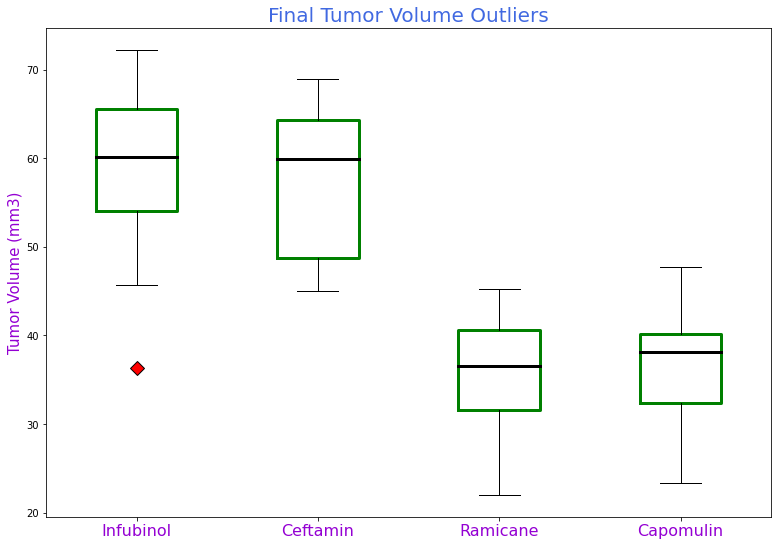

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Diaplay all four Drugs in one plot
data =[Infubinol_turmer_vol,Ceftamin_turmer_vol,Ramicane_turmer_vol,Capomulin_turmer_vol_S]

#Customize Box plot
font = dict(fontsize= 20,fontweight = 3,color = 'royalblue')
boxprops = dict(linestyle='-', linewidth=3, color='g')
medianprops = dict(linestyle='-', linewidth=3, color='k')
green_diamond = dict(markerfacecolor='r', marker='D' ,markersize= 10)
labels = [label for label in Treatments ] 

#Plot the values
fig1,ax1 = plt.subplots(figsize = (13,9))

#Set Title and labels
ax1.set_title('Final Tumor Volume Outliers' , fontdict=font)
ax1.set_ylabel("Tumor Volume (mm3)" ,fontdict=dict(fontsize= 15,fontweight = 3,color = 'darkviolet'))
ax1.boxplot(data , flierprops=green_diamond ,boxprops= boxprops,medianprops = medianprops,labels= labels)
plt.xticks(fontsize=16 , color = "darkviolet")

plt.show()

## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Create a df for Capomulin
Capomulin_df = Mouse_study_result_clean.loc[Mouse_study_result_clean["Drug Regimen"] == "Capomulin" ,['Mouse ID',"Drug Regimen",'Weight (g)','Tumor Volume (mm3)','Timepoint']]

#Extract mouse ID-s185 and its 'Tumor Volume (mm3)' and 'Timepoint'
Capomulin_Single_Mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID']== "s185" , ['Tumor Volume (mm3)','Timepoint']].reset_index(drop =True)

#Find x-Axis  and Y-Axis
y_axis = Capomulin_Single_Mouse_df["Tumor Volume (mm3)"]
x_axis = Capomulin_Single_Mouse_df["Timepoint"]

#Set index for plotting
Capomulin_Single_Mouse_df = Capomulin_Single_Mouse_df.set_index("Timepoint")
Capomulin_Single_Mouse_df

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,43.878496
10,37.614948
15,38.177232
20,36.866876
25,33.949940
30,32.959671
35,28.328531
40,25.472143


##### Note: Above Table shows Final Tumer Volume of the mouse "s185" treated with "Capomulin".


### Line Chart :


(20.0, 49.0)

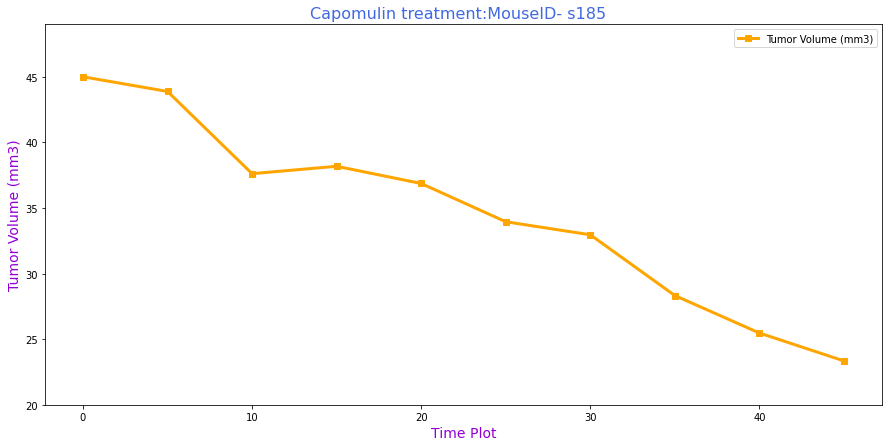

In [33]:
#Generate a line plot
Capomulin_plot = Capomulin_Single_Mouse_df.plot(figsize = (15,7), 
                                                legend= True , 
                                                marker ="s" ,
                                                linewidth = 3 , 
                                                color = 'orange')
#Set title and labels
Capomulin_plot.set_title("Capomulin treatment:MouseID- s185  ", fontsize = 16 , color ='royalblue')
Capomulin_plot.set_xlabel("Time Plot",fontsize = 14 , color ='darkviolet')
Capomulin_plot.set_ylabel('Tumor Volume (mm3)',fontsize = 14 , color ='darkviolet')
Capomulin_plot.set_ylim(20, max(Capomulin_Single_Mouse_df['Tumor Volume (mm3)'])+4)

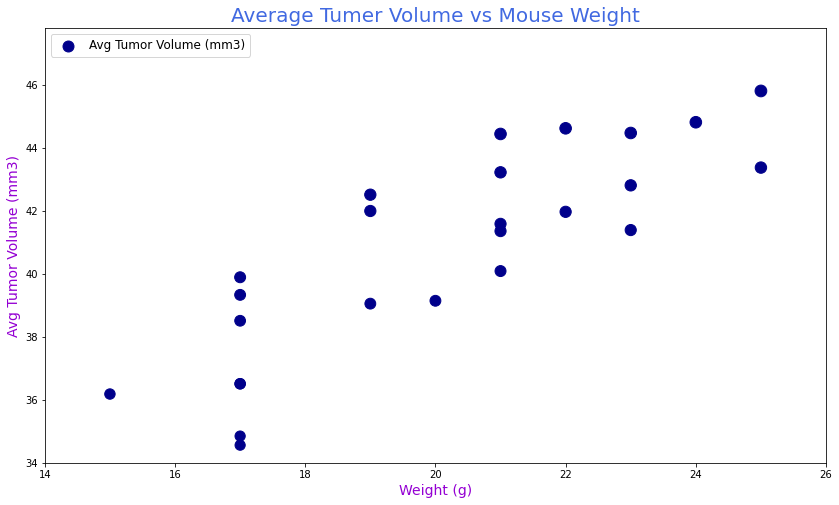

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Scatter = Capomulin_df.groupby('Mouse ID')
x_axis_scatter = Capomulin_Scatter['Weight (g)'].first()
y_axis_scatter =Capomulin_Scatter['Tumor Volume (mm3)'].mean()

#Set size of the marker
s = [n*3 for n in y_axis_scatter]

# Generate an scatter plot:
plt.figure(figsize=(14,8))
plt.scatter(x_axis_scatter, y_axis_scatter, color = 'darkblue' , marker ='o',s =s  , label = 'Avg Tumor Volume (mm3)')

#Set Title and Lables
plt.title("Average Tumer Volume vs Mouse Weight" , fontsize =20 ,color ="royalblue" )
plt.xlabel('Weight (g)',fontsize =14 ,color ="darkviolet" )
plt.ylabel('Avg Tumor Volume (mm3)',fontsize =14 ,color ="darkviolet" )
plt.legend(loc ='upper left' , fontsize = 12)

#Set X and Y  limits
plt.xlim(14 , max(x_axis_scatter)+1)
plt.ylim(34 , max(y_axis_scatter)+2)

plt.show()
plt.tight_layout()

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coefficiant for Capomulin regimen
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between mouse weight and average tumor volume:  {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume:  0.84


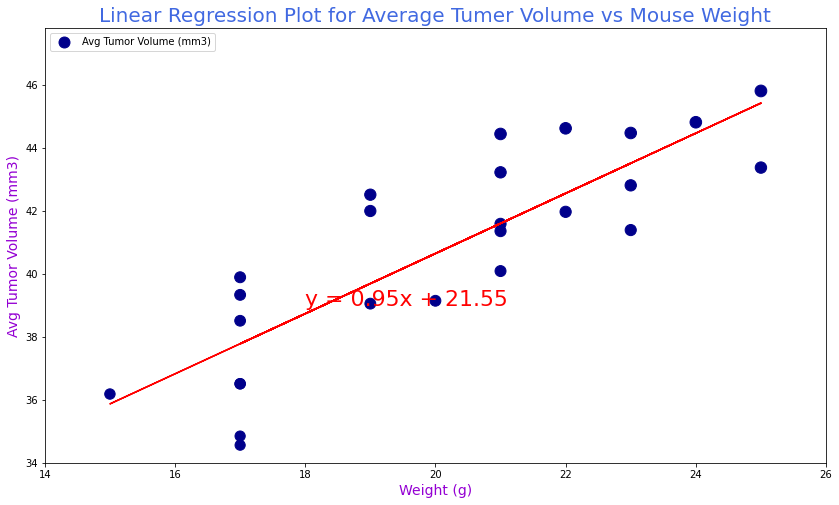

<Figure size 432x288 with 0 Axes>

In [36]:
#Linear regression model for  Mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Generate a sactter plot and annotate with equation
plt.figure(figsize=(14,8))
plt.scatter(x_axis_scatter, y_axis_scatter, color = 'darkblue' , marker ='o',s =s  , label = 'Avg Tumor Volume (mm3)')
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(18,39),fontsize=22,color="red")

#set Titles and Lables
plt.title("Linear Regression Plot for Average Tumer Volume vs Mouse Weight" , fontsize =20 ,color ="royalblue" )
plt.xlabel('Weight (g)',fontsize =14 ,color ="darkviolet")
plt.ylabel('Avg Tumor Volume (mm3)',fontsize =14 ,color ="darkviolet" )
plt.legend(loc ='upper left' , fontsize = 10)

#set x and y limits
plt.ylim(34 , max(y_axis_scatter)+2)
plt.xlim(14 , max(x_axis_scatter)+1)

plt.show()
plt.tight_layout()